<a href="https://colab.research.google.com/github/MukundIsGod/SceneDetection/blob/master/linearexif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/My Drive/exif/'

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 

In [ ]:
needs = ['Exposure', 'Aperture', 'ISO Speed', 'Focal Length']

exps = []
aps = []
isos = []
focs = []
for i in os.listdir(data):
  try:
    f = open(data + i)
    content = f.read().split('-')
  except:
    continue
  pairs = {'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
  content = filter(None, content)
  for j in content:
    parts = j.split('\n')
    parts[0] = parts[0].rstrip()
    #print(parts)
    if(parts[0] not in needs):
      continue
    pairs[parts[0]] = parts[1]
  print(pairs)  
  try:
    if(pairs['Exposure']=='lol' or pairs['ISO Speed']=='lol' or pairs['Aperture']=='lol' or pairs['Focal Length']=='lol'):
      continue
    if(',' in pairs['Focal Length']):
      continue
    if('f/' in pairs['Aperture']):
      aps.append(float(pairs['Aperture'].split('/')[1]))
    else:
      up = float(pairs['Aperture'].split('/')[0])
      down = float(pairs['Aperture'].split('/')[1])
      aps.append(float(up/down))
    isos.append(pairs['ISO Speed'])
    focs.append(pairs['Focal Length'].split(' ')[0])
    exps.append(pairs['Exposure'].split(' ')[0])
  except:
    continue

print(exps)
print(focs)
print(isos)
print(aps)

df = pd.DataFrame({
      'Exposure Time': exps,
      'Aperture': aps,
      'ISO Speed': isos,
      'Focal Length': focs
  })

{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lol', 'Aperture': 'lol', 'ISO Speed': 'lol', 'Focal Length': 'lol'}
{'Exposure': 'lo

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
df= df.dropna()

print(df)

      Exposure Time  Aperture  ISO Speed  Focal Length
0             0.017  3.300000      100.0           6.4
1             0.017  4.000000      400.0          22.0
2             0.025  2.800000      100.0           4.7
3             0.010  5.600000      200.0          32.0
4             0.008  4.500000      200.0          18.0
...             ...       ...        ...           ...
6047          0.033  3.700000      400.0          53.0
6048          0.001  4.500000      250.0          70.0
6049          0.017  6.339850      200.0          18.0
6050          0.001  3.700000      400.0           6.0
6051          0.001  4.970856      400.0         300.0

[5879 rows x 4 columns]


In [ ]:
#the whole process takes like 40 minutes so the df is saved here
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

NameError: ignored

In [ ]:
df = pd.read_csv('/content/drive/My Drive/data.csv')
df = df.set_index('Unnamed: 0')
df = df.reset_index(drop=True)

#a = np.array(df['Exposure Time'].values.tolist())
#df['Exposure Time'] = np.where(a > 9, 2000, a).tolist()

print(df)

df = df.drop(df.loc[df['ISO Speed']>1600].index)
df = df.drop(df.loc[df['Exposure Time']>20].index)
#df = df.drop(df.loc[df['Aperture']>10].index)
df = df.drop(df.loc[df['Focal Length']>100].index)
print(df)

print('Focal Length frequencies:-')
print(df['Focal Length'].value_counts())

print('Exposure frequencies:-')
df['Exposure Time'] = df['Exposure Time'].round(decimals=0)
print(df['Exposure Time'].value_counts())

print('Aperture frequencies:-')
df['Aperture'] = df['Aperture'].round(decimals=1)
print(df['Aperture'].value_counts())

print('ISO frequencies:-')
df['ISO Speed'] = (df['ISO Speed'] / 100).apply(np.floor).astype(float) *100
df['ISO Speed'] = df['ISO Speed'].replace([900], [1000])
print(df['ISO Speed'].value_counts())

      Exposure Time  Aperture  ISO Speed  Focal Length
0             0.017  3.300000      100.0           6.4
1             0.017  4.000000      400.0          22.0
2             0.025  2.800000      100.0           4.7
3             0.010  5.600000      200.0          32.0
4             0.008  4.500000      200.0          18.0
...             ...       ...        ...           ...
5874          0.033  3.700000      400.0          53.0
5875          0.001  4.500000      250.0          70.0
5876          0.017  6.339850      200.0          18.0
5877          0.001  3.700000      400.0           6.0
5878          0.001  4.970856      400.0         300.0

[5879 rows x 4 columns]
      Exposure Time  Aperture  ISO Speed  Focal Length
0             0.017  3.300000      100.0           6.4
1             0.017  4.000000      400.0          22.0
2             0.025  2.800000      100.0           4.7
3             0.010  5.600000      200.0          32.0
4             0.008  4.500000      200.0

In [ ]:
#load csv file if needed
y = df['ISO Speed']
x = df.drop(columns = 'ISO Speed')
#x = x.drop(columns = 'Aperture')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=1) 
reg = linear_model.LinearRegression()

reg.fit(x_train, y_train) 

preds = reg.predict(x_test)

print(x_test)
print('Slope:' ,reg.coef_)
print('Intercept:', reg.intercept_)
print('Mean error: {}'.format(metrics.mean_absolute_error(y_test, preds)))
print('Variance score: {}'.format(reg.score(x_test, y_test)))

      Exposure Time  Aperture  Focal Length
3992           13.0      10.0          18.0
5409            0.0       8.3          50.0
3397            0.0       6.0          17.0
5413            0.0       6.6          18.0
4761            0.0       5.1          15.3
...             ...       ...           ...
956             0.0       3.0          50.0
2404            0.0      13.0          17.0
4236            0.0       7.4          10.0
253             0.0       6.0          18.0
5120            0.0       6.0          18.0

[538 rows x 3 columns]
Slope: [ -9.26808697 -13.38807199   1.44022139]
Intercept: 512.9071176716714
Mean error: 336.7329823789892
Variance score: 0.007889313551797006


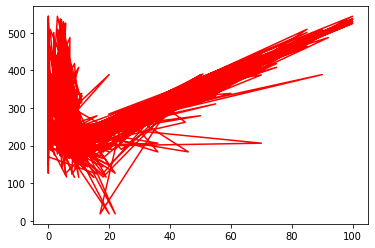

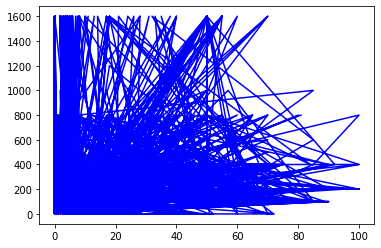

In [ ]:
import matplotlib.pyplot as plt

# predicted values
plt.plot(x_test, preds, color='r')
plt.show()
plt.plot(x_test, y_test, color='b')
plt.show()

In [ ]:
exps=[0, 0, 0]
aps=[11.0, 3.0, 2.0]
isos=[200.0, 100.0, 1600.0]
focs=[41.0, 16.0, 50.0]
df = pd.DataFrame({
      'Exposure Time': exps,
      'Aperture': aps,
      'ISO Speed': isos,
      'Focal Length': focs
  })

print(df)

b = df['ISO Speed']
#a = df.drop(columns = 'Focal Length')
a = df.drop(columns = 'ISO Speed')

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.1, 
                                                    random_state=1) 
print(a_train)
print(a_test)

lulz = reg.predict(a_train)

print(lulz)
print(b_train)

   Exposure Time  Aperture  ISO Speed  Focal Length
0              0      11.0      200.0          41.0
1              0       3.0      100.0          16.0
2              0       2.0     1600.0          50.0
   Exposure Time  Aperture  Focal Length
2              0       2.0          50.0
1              0       3.0          16.0
   Exposure Time  Aperture  Focal Length
0              0      11.0          41.0
[378.56888292 254.38376889]
2    1600.0
1     100.0
Name: ISO Speed, dtype: float64


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('Mean error: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Variance score: {}'.format(regressor.score(x_test, y_test)))

Mean error: 201.20960094321774
Variance score: -0.10615567201782272


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('Mean error: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Variance score: {}'.format(regressor.score(x_test, y_test)))

Mean error: 357.99424721842894
Variance score: -0.154534351224316


In [ ]:
#STEALING FROM BIG ONE
import re
import requests
from bs4 import BeautifulSoup
from PIL import Image, ExifTags
from io import BytesIO

site = 'http://data.csail.mit.edu/graphics/fivek/'
response = requests.get(site)

soup = BeautifulSoup(response.text, 'html.parser')



In [ ]:
containers = soup.findAll('td')
fnums = []
shutters = []
isos = []
focs = []
for i in containers:
  if 'EXIF:' in i: 
    vals = [j for j in i]
    vals = vals[-1].split(' ')
    print(vals)
    break
    fnum = shutter = iso = foc = 'lol'
    for j in vals:
      if 'F/' in j:
        fnum = float(j[2:])
      elif '1/' in j:
        num = float(j[0])
        den = float(j[2:])
        if j =='1/0':
          continue
        shutter = float(num/den)
      elif 'ISO' in j:
        iso = float(j[3:])
      elif 'mm' in j:
        foc = float(j[:-2])
    
    if fnum!='lol' and shutter!='lol' and iso!='lol' and foc!='lol':
      fnums.append(fnum)
      shutters.append(shutter)
      isos.append(iso)
      focs.append(foc)

print(fnums)
print(shutters)
print(isos)
print(focs)    


['NIKON', 'D70', '30mm', 'F/10.0', '1/400', 'ISO200', '6.0MP']
[]
[]
[]
[]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 

In [ ]:
df = pd.DataFrame({
    'Focal Length': focs,
    'Shutter Speed': shutters,
    'ISO': isos
})

df = df.apply(pd.to_numeric, errors='coerce')
df= df.dropna()

print(df)

      Focal Length  Shutter Speed     ISO
0             30.0       0.002500   200.0
1             50.0       0.040000  2000.0
2             34.0       0.008000   100.0
3             48.0       0.004000   200.0
4             75.0       0.001333   200.0
...            ...            ...     ...
1681         450.0       0.002857   200.0
1682          35.0       0.012500   100.0
1683          70.0       0.010000   200.0
1684          43.0       0.333333  1600.0
1685          16.0       0.003125   200.0

[1686 rows x 3 columns]


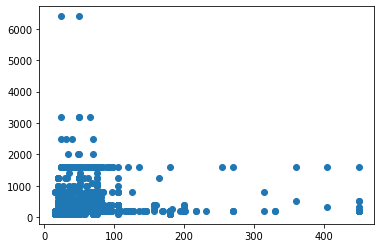

In [ ]:
plt.scatter(df['Focal Length'], df['ISO'])

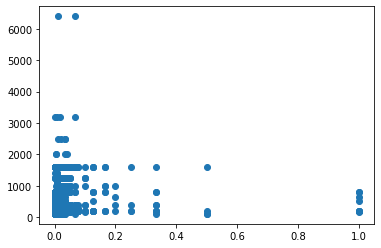

In [ ]:
plt.scatter(df['Shutter Speed'], df['ISO'])

In [ ]:
y = df['ISO']
x = df.drop(columns = 'ISO')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, 
                                                    random_state=1) 
reg = linear_model.LinearRegression()

reg.fit(x_train, y_train) 

preds = reg.predict(x_test)

print(metrics.mean_squared_error(y_test, preds))
print(metrics.r2_score(y_test, preds))
print('Variance score: {}'.format(reg.score(x_test, y_test))) 

267992.5143277727
-0.02262165979624542
Variance score: -0.02262165979624542
